In this notebook I am gonna work on the plots generated for the poster. Step:

- Aggregate the data in three different arrays:
    - total latency
    - tracking latency
    - display latency
    
- plto the figures
    - radar (the best and worst cases must be observable)
    - best and worst latency histograms
    - violin blot (complementing the radar plots)

In [153]:
import glob
from os import path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Example of how to read individual data

### Total Latency

In [154]:
import sys
sys.path.append('../Pipeline/')
import plot_latency_hist as plh

In [3]:
filename = 's37_060318'
df = pd.read_csv('..//Measurements//' + filename + '.csv')

In [4]:
data = plh.plot_latency_hist(df, return_data=True).values.reshape(-1,1)

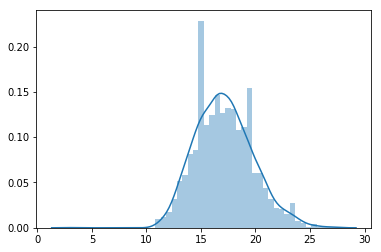

In [5]:
sns.distplot(data)
plt.show()

### Tracking Latency

### Display Latency

In [6]:
import sys
sys.path.append('../Pipeline/')
import plot_disp_latency_hist as plh_disp

In [7]:
filename = 's01_120318'
df = pd.read_csv('..//Measurements//disp_latency//' + filename + '.csv')

In [8]:
data = plh_disp.plot_disp_latency_hist(df, return_data=True).values.reshape(-1,1)

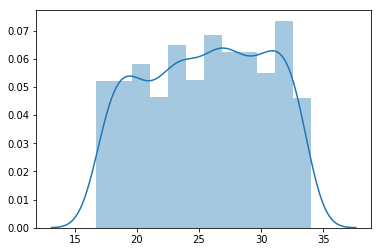

In [9]:
sns.distplot(data)
plt.show()

----

## Reading all the .csv files in a specific path

In [10]:
file_path = r'../Measurements/*.csv'

In [11]:
ff = glob.glob(file_path)

In [12]:
ff

['../Measurements\\s01_280218.csv',
 '../Measurements\\s02_280218.csv',
 '../Measurements\\s03_280218.csv',
 '../Measurements\\s04_280218.csv',
 '../Measurements\\s05_280218.csv',
 '../Measurements\\s06_280218.csv',
 '../Measurements\\s07_280218.csv',
 '../Measurements\\s08_280218.csv',
 '../Measurements\\s09_280218.csv',
 '../Measurements\\s10_280218.csv',
 '../Measurements\\s11_280218.csv',
 '../Measurements\\s12_280218.csv',
 '../Measurements\\s13_280218.csv',
 '../Measurements\\s14_280218.csv',
 '../Measurements\\s15_280218.csv',
 '../Measurements\\s16_280218.csv',
 '../Measurements\\s17_280218.csv',
 '../Measurements\\s18_280218.csv',
 '../Measurements\\s19_280218.csv',
 '../Measurements\\s20_280218.csv',
 '../Measurements\\s21_280218.csv',
 '../Measurements\\s22_280218.csv',
 '../Measurements\\s23_280218.csv',
 '../Measurements\\s24_280218.csv',
 '../Measurements\\s25_280218.csv',
 '../Measurements\\s26_280218.csv',
 '../Measurements\\s27_280218.csv',
 '../Measurements\\s28_28021

### Total Latency data aggregation

In [62]:
data_latency_agg = []
for ind, fname in enumerate(glob.glob(r'../Measurements/*.csv')):
    print(ind, fname, path.splitext(path.basename(fname))[0])
    df = pd.read_csv(fname)
    data_latency_agg.append(plh.plot_latency_hist(df, return_data=True).values.reshape(-1,1))

0 ../Measurements\s01_280218.csv s01_280218
1 ../Measurements\s02_280218.csv s02_280218
2 ../Measurements\s03_280218.csv s03_280218
3 ../Measurements\s04_280218.csv s04_280218
4 ../Measurements\s05_280218.csv s05_280218
5 ../Measurements\s06_280218.csv s06_280218
6 ../Measurements\s07_280218.csv s07_280218
7 ../Measurements\s08_280218.csv s08_280218
8 ../Measurements\s09_280218.csv s09_280218
9 ../Measurements\s10_280218.csv s10_280218
10 ../Measurements\s11_280218.csv s11_280218
11 ../Measurements\s12_280218.csv s12_280218
12 ../Measurements\s13_280218.csv s13_280218
13 ../Measurements\s14_280218.csv s14_280218
14 ../Measurements\s15_280218.csv s15_280218
15 ../Measurements\s16_280218.csv s16_280218
16 ../Measurements\s17_280218.csv s17_280218
17 ../Measurements\s18_280218.csv s18_280218
18 ../Measurements\s19_280218.csv s19_280218
19 ../Measurements\s20_280218.csv s20_280218
20 ../Measurements\s21_280218.csv s21_280218
21 ../Measurements\s22_280218.csv s22_280218
22 ../Measurements\s

In [51]:
len(data_latency_agg[1])

660

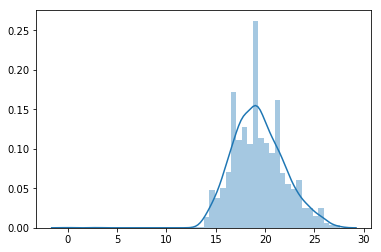

In [48]:
sns.distplot(data_latency_agg[25])

## Define the path

In [179]:
file_path = glob.glob(r'../Measurements/*.csv')

### Samples aggregated dataframe

In [176]:
samples_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # add the session column to this dataframe
    df = pd.read_csv(fname)
    df['session'] = [ind] * len(df)

    # put this in the master dataframe
    samples_df = pd.concat([samples_df, df], axis=0)

0 ../Measurements/disp_latency\s01_120318.csv s01_120318
1 ../Measurements/disp_latency\s02_120318.csv s02_120318
2 ../Measurements/disp_latency\s03_120318.csv s03_120318
3 ../Measurements/disp_latency\s04_120318.csv s04_120318
4 ../Measurements/disp_latency\s05_120318.csv s05_120318


In [177]:
# samples_df

### Trials aggregated latency and session values

In [180]:
latency_df = pd.DataFrame()

for ind, fname in enumerate(file_path):
    print(ind, fname, path.splitext(path.basename(fname))[0])

    # create a dataframe of the latency and add it to the other dataframe
    df = pd.read_csv(fname)
    data_latency = plh.plot_latency_hist(df, return_data=True).values.reshape(-1)        

    dd = []
    dd.append(data_latency)        
    dd.append([ind] * len(data_latency))
    dd.append(np.arange(1, len(data_latency)+1))
    dd = np.array(dd).transpose()

    df_lat = pd.DataFrame(dd, 
                          columns=['latency', 'session', 'Trial'])
    latency_df = pd.concat([latency_df, df_lat], axis=0)
    latency_df.session = latency_df.session.astype(int)
    latency_df.Trial = latency_df.Trial.astype(int)

0 ../Measurements\s01_280218.csv s01_280218
1 ../Measurements\s02_280218.csv s02_280218
2 ../Measurements\s03_280218.csv s03_280218
3 ../Measurements\s04_280218.csv s04_280218
4 ../Measurements\s05_280218.csv s05_280218
5 ../Measurements\s06_280218.csv s06_280218
6 ../Measurements\s07_280218.csv s07_280218
7 ../Measurements\s08_280218.csv s08_280218
8 ../Measurements\s09_280218.csv s09_280218
9 ../Measurements\s10_280218.csv s10_280218
10 ../Measurements\s11_280218.csv s11_280218
11 ../Measurements\s12_280218.csv s12_280218
12 ../Measurements\s13_280218.csv s13_280218
13 ../Measurements\s14_280218.csv s14_280218
14 ../Measurements\s15_280218.csv s15_280218
15 ../Measurements\s16_280218.csv s16_280218
16 ../Measurements\s17_280218.csv s17_280218
17 ../Measurements\s18_280218.csv s18_280218
18 ../Measurements\s19_280218.csv s19_280218
19 ../Measurements\s20_280218.csv s20_280218
20 ../Measurements\s21_280218.csv s21_280218
21 ../Measurements\s22_280218.csv s22_280218
22 ../Measurements\s

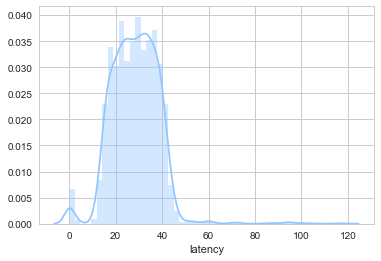

In [174]:
sns.distplot(latency_df.latency[latency_df.session==21])

### Trying merge the two Dataframe

In [167]:
result = pd.merge(latency_df, samples_df, how='left', on=['session', 'Trial'])

In [168]:
result

,latency,session,Trial,Time,Chan1,Chan2,LED_State
0,27.244,0,1,41548.0,0.0,2.0,1.0
1,27.244,0,1,41908.0,0.0,3.0,1.0
2,27.244,0,1,42292.0,0.0,3.0,1.0
3,27.244,0,1,42732.0,0.0,7.0,1.0
4,27.244,0,1,43172.0,0.0,2.0,1.0
5,27.244,0,1,43612.0,0.0,3.0,1.0
6,27.244,0,1,44052.0,0.0,7.0,1.0
7,27.244,0,1,44492.0,0.0,0.0,1.0
8,27.244,0,1,44932.0,0.0,0.0,1.0
9,27.244,0,1,45372.0,0.0,0.0,1.0


In [144]:
# result[:5000000].plot(x='Time', y='latency')

## Using seaborn to plot stuff from pandas dataframe

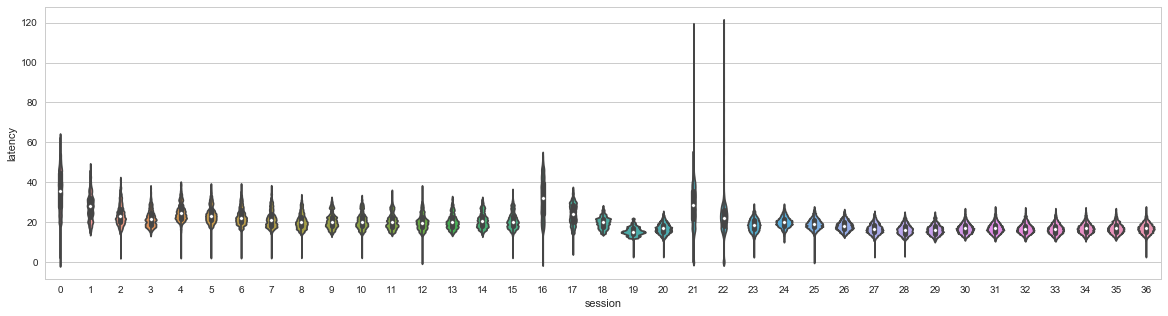

In [169]:
plt.figure(figsize=(20,5))
sns.violinplot(x=result.session, y=result.latency)

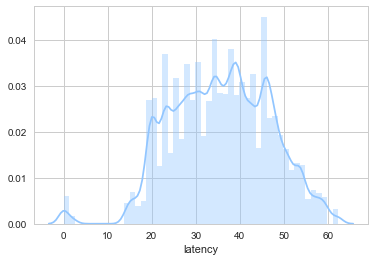

In [170]:
sns.distplot(result.latency[result.session==0])

In [147]:
new_results = result[result.session%2==0]

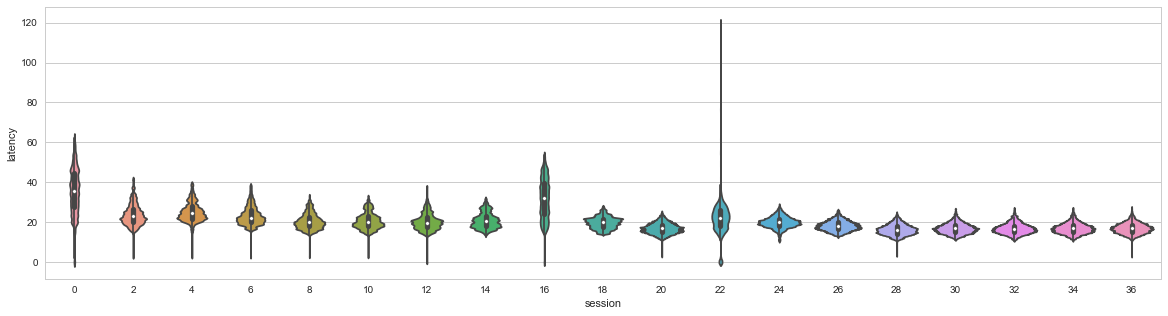

In [148]:
plt.figure(figsize=(20,5))
sns.violinplot(x=new_results.session, y=new_results.latency)

### Two-sided violin plot, each side for different display frame rate

let's divide the data into two

In [150]:
result['FPS'] = [0] * len(result)

In [151]:
result.FPS[result.session<18] = 120
result.FPS[result.session>=18] = 240
result.session[result.session>=18] -= 18

c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\mohammad bashiri\anaconda3\envs\neuron\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipyk

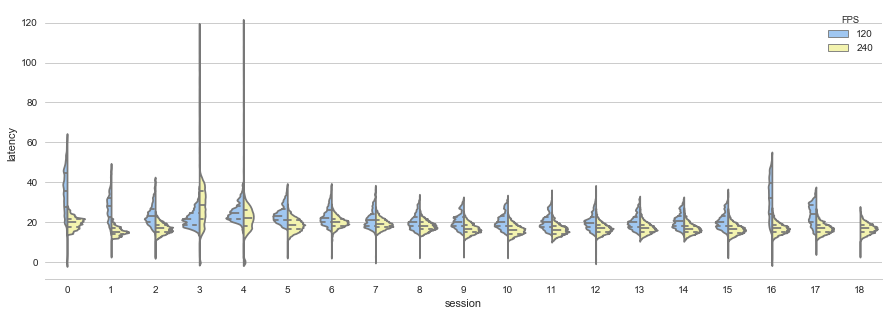

In [152]:
plt.figure(figsize=(15,5))
sns.set(style="whitegrid", palette="pastel", color_codes=True)

sns.violinplot(x="session", y="latency", hue="FPS", data=result, split=True,
               inner="quart", palette={120: "b", 240: "y"})
sns.despine(left=True)

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>

### Merging two dataframes with unequal size

In [91]:
myarr = np.random.random((10,3))
df = pd.DataFrame(myarr,
                  columns=['A', 'B', 'C'])

df.index = np.arange(10,20)
df

,A,B,C
10,0.996017,0.155013,0.875054
11,0.419894,0.269292,0.041953
12,0.167441,0.557760,0.176248
13,0.197388,0.025471,0.292842
14,0.601760,0.791682,0.342646
15,0.020082,0.155815,0.562305
16,0.751213,0.041049,0.236405
17,0.358684,0.592297,0.651157
18,0.148158,0.594029,0.860880
19,0.365334,0.557421,0.802426


In [92]:
new_df = pd.DataFrame(np.arange(10,15), 
                      columns=['lat'])

In [93]:
df = pd.concat([df, new_df], axis=1)

In [97]:
df

,A,B,C,lat
0,NaN,NaN,NaN,10.0
1,NaN,NaN,NaN,11.0
2,NaN,NaN,NaN,12.0
3,NaN,NaN,NaN,13.0
4,NaN,NaN,NaN,14.0
10,0.996017,0.155013,0.875054,NaN
11,0.419894,0.269292,0.041953,NaN
12,0.167441,0.557760,0.176248,NaN
13,0.197388,0.025471,0.292842,NaN
14,0.601760,0.791682,0.342646,NaN


## repeating the same element in a column

In [129]:
session = 's01_280318'
lat = np.arange(10,15)

dd = []
dd.append(lat)
dd.append([session] * len(lat))
dd = np.array(dd).transpose()

new_df = pd.DataFrame(dd, 
                      columns=['lat', 'session'])

In [131]:
new_df

,lat,session
0,10,s01_280318
1,11,s01_280318
2,12,s01_280318
3,13,s01_280318
4,14,s01_280318


### Adding the dataframe (wit repeated element) to another, with unequal size

In [155]:
myarr = np.random.random((10,3))
df = pd.DataFrame(myarr,
                  columns=['A', 'B', 'C'])

session = 2 # ind
df['session'] = [2] * len(df)

df.index = np.arange(10,20)
df

,A,B,C,session
10,0.363449,0.065609,0.196602,2
11,0.750061,0.038699,0.571588,2
12,0.724926,0.669919,0.259108,2
13,0.657232,0.458637,0.374715,2
14,0.875458,0.793330,0.892054,2
15,0.152543,0.960142,0.666840,2
16,0.693038,0.045146,0.767073,2
17,0.807239,0.014749,0.863703,2
18,0.447151,0.321832,0.159825,2
19,0.574787,0.334657,0.883567,2


In [156]:
filename = 's01_280318'
lat = np.arange(10,15)

dd = []
dd.append(lat)
dd.append([filename] * len(lat))
dd = np.array(dd).transpose()

new_df = pd.DataFrame(dd, 
                      columns=['lat', 'session'])

new_df

,lat,session
0,10,s01_280318
1,11,s01_280318
2,12,s01_280318
3,13,s01_280318
4,14,s01_280318


In [157]:
new_df.index = df.index[:len(new_df)]

very_new_df = pd.concat([df, new_df], axis=1)
very_new_df

,A,B,C,session,lat,session
10,0.363449,0.065609,0.196602,2,10,s01_280318
11,0.750061,0.038699,0.571588,2,11,s01_280318
12,0.724926,0.669919,0.259108,2,12,s01_280318
13,0.657232,0.458637,0.374715,2,13,s01_280318
14,0.875458,0.793330,0.892054,2,14,s01_280318
15,0.152543,0.960142,0.666840,2,NaN,NaN
16,0.693038,0.045146,0.767073,2,NaN,NaN
17,0.807239,0.014749,0.863703,2,NaN,NaN
18,0.447151,0.321832,0.159825,2,NaN,NaN
19,0.574787,0.334657,0.883567,2,NaN,NaN


In [160]:
dtf = pd.DataFrame()

In [164]:
dd

,A,B,C,session,lat,session,lat,session
10,0.363449,0.065609,0.196602,2,10,s01_280318,10,s01_280318
11,0.750061,0.038699,0.571588,2,11,s01_280318,11,s01_280318
12,0.724926,0.669919,0.259108,2,12,s01_280318,12,s01_280318
13,0.657232,0.458637,0.374715,2,13,s01_280318,13,s01_280318
14,0.875458,0.793330,0.892054,2,14,s01_280318,14,s01_280318
15,0.152543,0.960142,0.666840,2,NaN,NaN,NaN,NaN
16,0.693038,0.045146,0.767073,2,NaN,NaN,NaN,NaN
17,0.807239,0.014749,0.863703,2,NaN,NaN,NaN,NaN
18,0.447151,0.321832,0.159825,2,NaN,NaN,NaN,NaN
19,0.574787,0.334657,0.883567,2,NaN,NaN,NaN,NaN
